
# <center><h3>Pima Diabetes - Na&iuml;ve Bayes Classifier</h3></center>

## Introduction
The [Pima](https://en.wikipedia.org/wiki/Pima_people) are a group of **Native Americans** living in Arizona. A genetic predisposition allowed this group to survive normally to a diet poor of carbohydrates for years. In the recent years, because of a sudden shift from traditional agricultural crops to processed foods, together with a decline in physical activity, made them develop **the highest prevalence of type 2 diabetes** and for this reason they have been subject of many studies.

## Dataset
The dataset includes data from **768** women with **8** independent predictor attributes and **1** dependent target attribute, in particular:
 * **Pregnancies**: Number of times pregnant
 * **Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
 * **BloodPressure**: Diastolic blood pressure (mm Hg)
 * **SkinThickness**: Triceps skin fold thickness (mm)
 * **Insulin**: 2-Hour serum insulin (mu U/ml)
 * **BMI**: Body mass index (weight in kg/(height in m)^2)
 * **DiabetesPedigreeFunction**: Diabetes pedigree function
 * **Age**: Age of the patient (years)

The last column (**Outcome**) of the dataset is a dependent attribute which indicates if the person has been diagnosed with diabetes (1) or not (0)

Let's do initial Exploratory Data Analysis(EDA) so as to discover any hidden patterns followed by creating a predictor using ***Na&iuml;ve Bayes*** classifier and fine tune it to prepare a model.

---

## Imports and configuration
Import all the libraries needed to load the dataset, visualize it and do predictive modeling.

In [1]:
# Numerical calculation
import numpy as np

# Data handling
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical testing
from statsmodels.formula.api import ols
from scipy.stats import shapiro

# Predictive Modeling
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve

In [2]:
# Configure for any default setting of any library
%matplotlib inline
sns.set(style='darkgrid', palette='deep', font='sans-serif', font_scale=1.3, color_codes=True)

**Comments**
- **``%matplotlib inline``** sets the backend of matplotlib to the 'inline' backend: With this backend, the output of plotting commands is displayed inline without needing to call plt.show() every time a data is plotted.
- Set few of the Seaborn's asthetic parameters

---

## Load the Dataset

In [3]:
# Load the dataset into a Pandas dataframe called pima and assign it the column headers
headers = np.array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 
                    'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])
pima = pd.read_csv('pima-indians-diabetes.data', names=headers)

In [4]:
# Check the head of the dataset
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Check the tail of the dataset
pima.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


**Comments**
* To take a closer look at the data, pandas library provides **“.head()”** function which returns first five observations and **“.tail()”** function which returns last five observations of the data set.

---

## Inspect the Dataset
The dataset is divided into two parts, namely, **feature matrix** and the **response vector**.

- Feature matrix contains all the vectors(rows) of dataset in which each vector consists of the value of **dependent features**. In above dataset, features are *Pregnancies*, *Glucose*, *BloodPressure*, *SkinThickness*, *Insulin*, *BMI*, *DiabetesPedigreeFunction* and *Age*.
- Response vector contains the value of **class variable**(prediction or output) for each row of feature matrix. In above dataset, the class variable name is *Outcome*.

In [6]:
# Get the shape and size of the dataset
pima.shape

(768, 9)

In [7]:
# Get more info on it
# 1. Name of the columns
# 2. Find the data types of each columns
# 3. Look for any null/missing values
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Observations**
- The dataset comprises of **768 rows** and **9 columns**
- All columns are of type integer where as only BMI and DiabetesPedigreeFunction are of type float
- There are **No null/missing values** present in the dataset

In [8]:
# Check for any Non-Real value present in the dataset such as '?' or '*' etc.
pima[~pima.applymap(np.isreal).all(1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


**Comments**
- **``np.isreal``** a numpy function which checks each column for each row and returns a bool array, 
- where True if input element is real.
- **``.applymap``** is pandas dataframe function that applies the np.isreal function columnwise
- **~** sysmbol helps filtering out all those records where Non-Real values are present

In [9]:
# Describe the dataset with various summary and statistics
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Comments**
- This **".describe()"** function generates descriptive statistics that summarizes the central tendency, dispersion and shape of a dataset's distribution, excluding ``NaN`` values
- **``Central Tendency``** is represented by indices *min, 25%, 50%, 75% and max*.
- 25% is also known as **``First Quartile (Q1)``**, 50% as Second Quartile or **``Median (Q2)``** and 75% as **``Third Quartile (Q3)``**

**Observations**
- The dataset contains only data about female patients who are of **age 21 yrs. or older**
- First 6 predictors have a minimum value of 0 present in the Central Tendency chart, hence the distributions contains one or more zero values.
- In reality, unlike *Pregnencies*, it is impossible to have zero values for all other attributes i.e. *Glucose*, *BloodPressure*, *SkinThickness*, *Insulin* and *BMI* from biological standpoint. Hence assuming these constitues **encoded missing data**.

In [10]:
# Compare class wise mean
pd.pivot_table(pima, index='Outcome', aggfunc=['mean'])

mean                                                    \
               Age        BMI BloodPressure DiabetesPedigreeFunction   
Outcome                                                                
0        31.190000  30.304200     68.184000                 0.429734   
1        37.067164  35.142537     70.824627                 0.550500   

                                                           
            Glucose     Insulin Pregnancies SkinThickness  
Outcome                                                    
0        109.980000   68.792000    3.298000     19.664000  
1        141.257463  100.335821    4.865672     22.164179

**Observations**
- Average value of all the predictors in Diabetic category is more than non-diabetic category

### Understanding the target variable

In [11]:
# Find count of unique target variable
len(pima['Outcome'].unique())
# OR
pima['Outcome'].nunique()

2

In [12]:
# What are the different values for the dependant variable
pima['Outcome'].unique()

array([1, 0], dtype=int64)

In [13]:
# Find out the value counts in each outcome category
pima['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

**Observation**
- Target variable/Dependent variable is discrete and categorical in nature
- There are two unique outcomes of the dataset which indicates if the person has been diagnosed with diabetes (1) or not (0)
- The ratio of diabetic to non-diabetic women in the dataset is close to 1:2

### Finding out encoded missing data

In [14]:
print("The count of 0's in various distributions, which are impossible from biological standpoint:")
zeros = pd.DataFrame(columns=['Feature','Diabetic', 'Non-Diabetic', 'Total'])
for ix, col in enumerate(pima.columns[1:-3]):
    tmp = pima[pima[col] == 0].groupby('Outcome')[col].count()
    zeros.loc[ix] = [col, tmp[1], tmp[0], len(pima[pima[col]==0])]
    
zeros

The count of 0's in various distributions, which are impossible from biological standpoint:


,Feature,Diabetic,Non-Diabetic,Total
0,Glucose,2,3,5
1,BloodPressure,16,19,35
2,SkinThickness,88,139,227
3,Insulin,138,236,374
4,BMI,2,9,11


---
## Univariate Analysis
Let's explore the spread of data points or the observations across two different Outcome classes.

D:\Installation\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Installation\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Installation\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Installation\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Installation\Anaconda3\lib\site-packages\matplotlib\axes\_axe

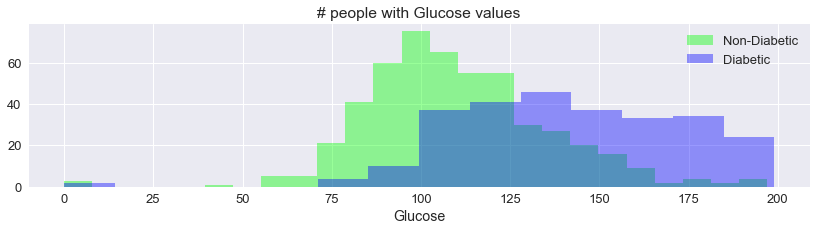

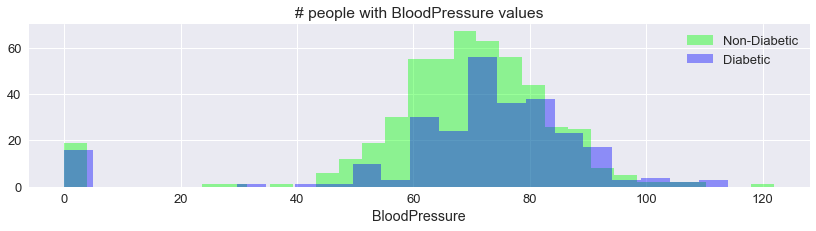

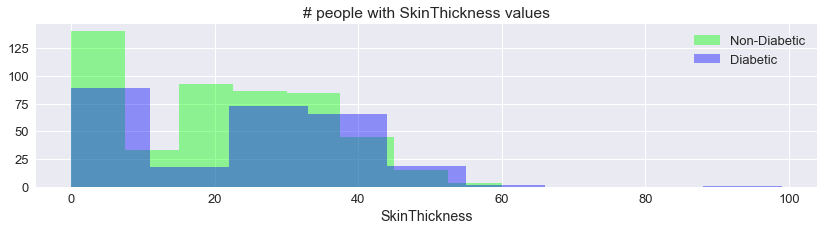

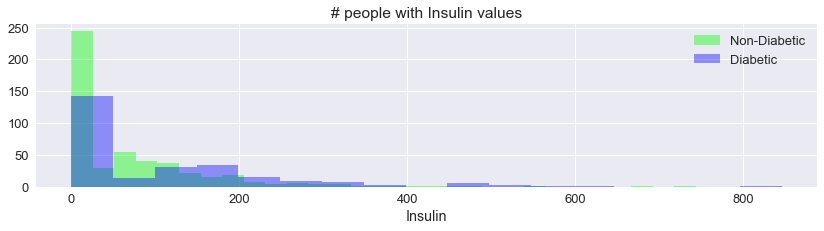

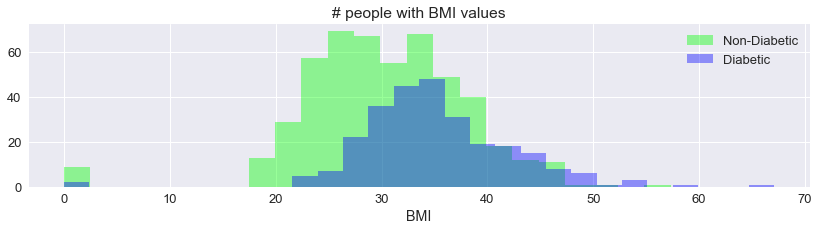

In [15]:
for test in pima.columns[1:6]:
    plt.figure(figsize=(14,3))
    bp_pivot = pima.groupby(test).Outcome.count().reset_index()
    sns.distplot(pima[pima['Outcome'] == 0][test], color='lime', kde=False, label='Non-Diabetic')
    sns.distplot(pima[pima['Outcome'] == 1][test], color='blue', kde=False, label='Diabetic')
    plt.legend()
    plt.title(f'# people with {test} values')

---
## Bivariate Analysis
Bivariate analysis is one of the simplest forms of quantitative analysis which involves the study of two variables, for the purpose of determining the emperical relationship between them.
* ### Pairplot
Pairplot helps picturizing the pair wise relationship between two variables. It creates a square matrix of no of continous attributes of the dataset. The diagonal plots represents the histogram and/or the kde plot of a particular attributes where as the upper or lower trangular plots represents the co-linearity of two attributes.

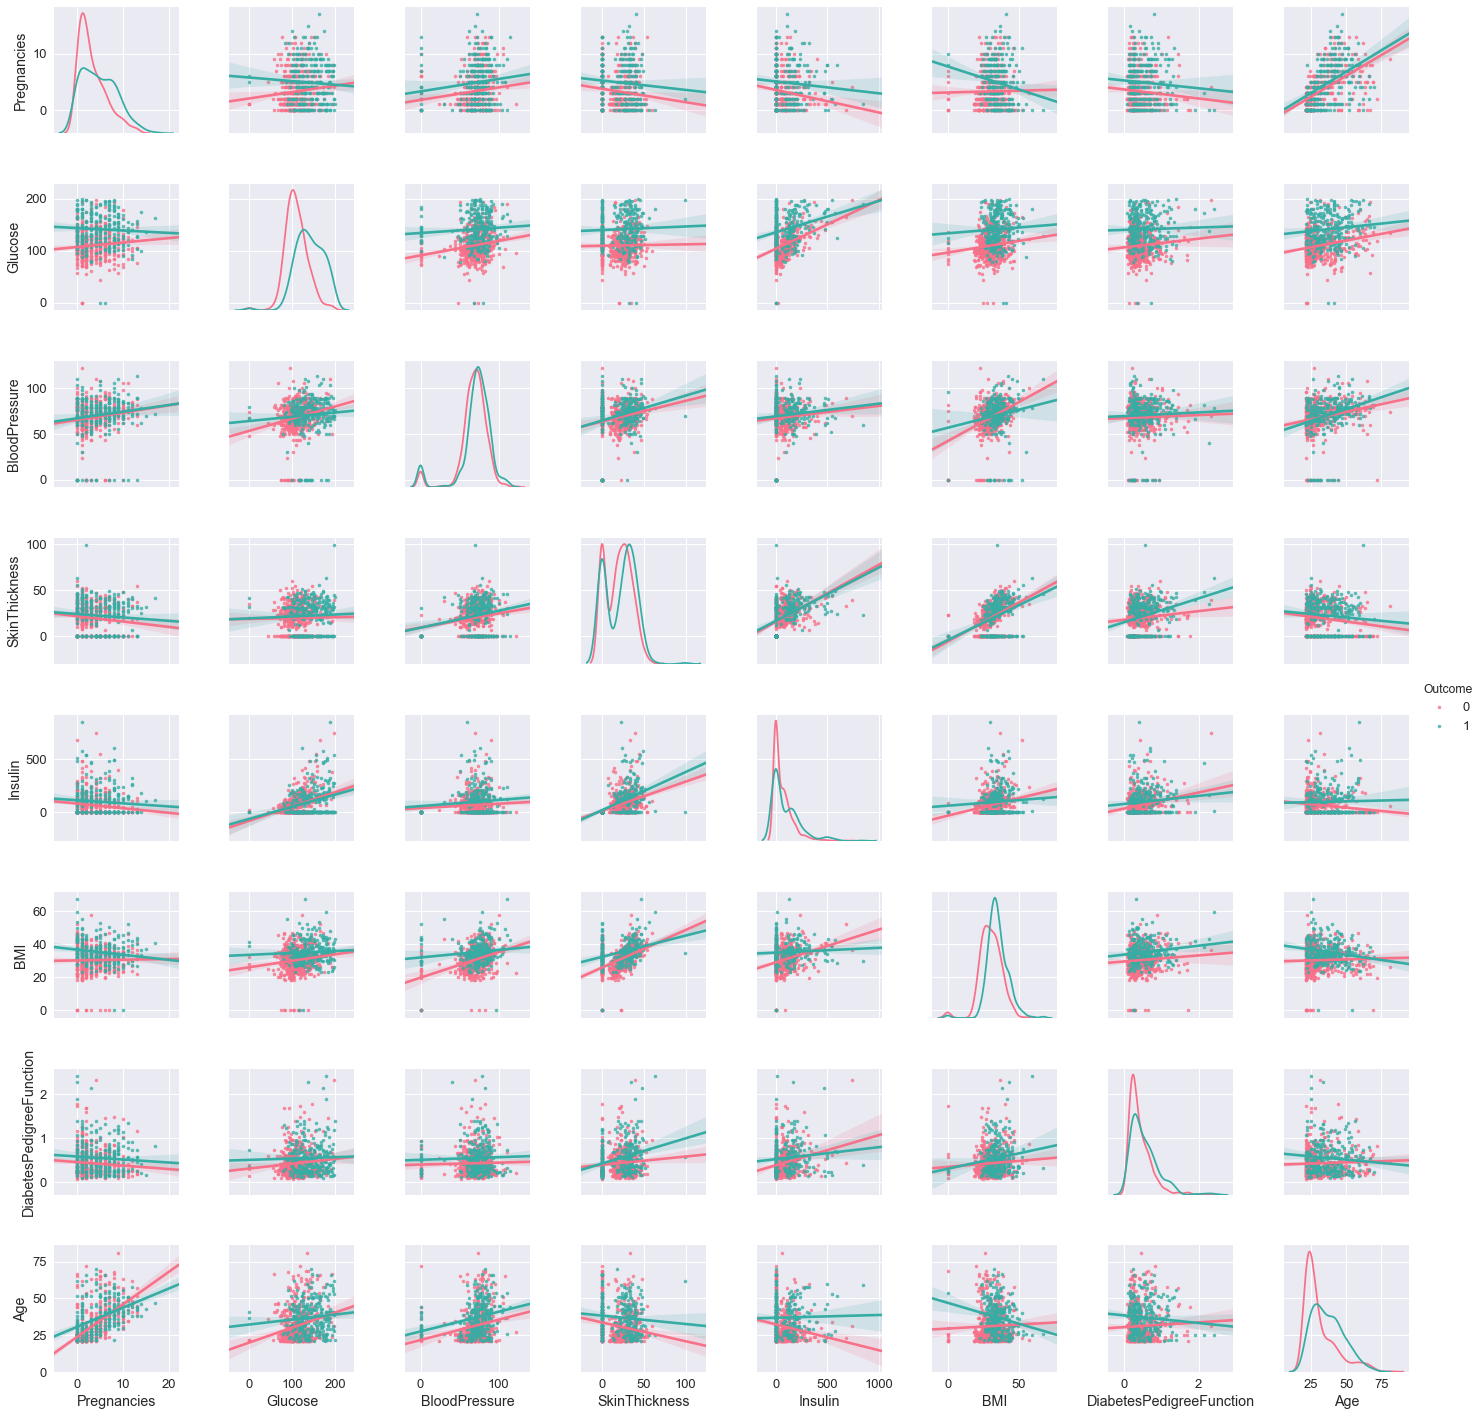

In [16]:
# Pairwise relationship in each of the category of Outcome
sns.pairplot(pima, hue='Outcome', vars=pima.columns[:-1],
             kind='reg', diag_kind='kde', palette='husl', markers='.')

* ### Data Correlation Matrix
The correlation matrix is an important tool for Bivariate Analysis which helps to understand the correlation between different attributes. The values range from -1 to 1 and the closer a value to 1 the better is the correlation among them.

In [17]:
# Find the correlation matrix
pima.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


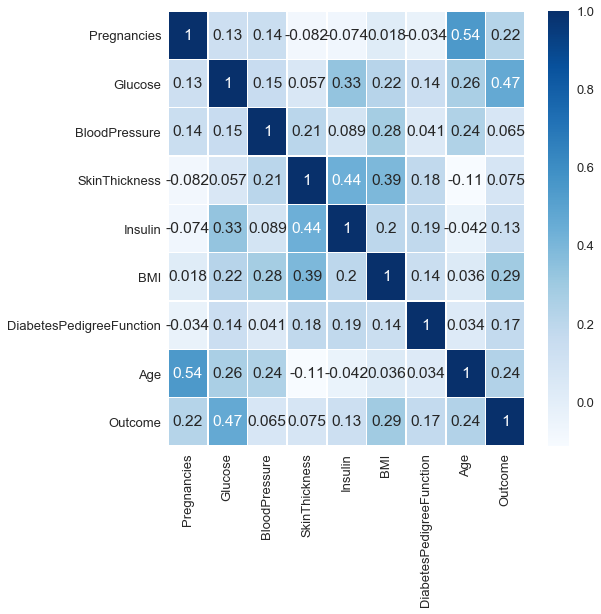

In [18]:
# Visualize the correlation matrix
plt.figure(figsize=(8,8))
sns.heatmap(pima.corr(), annot=True, cmap='Blues', linewidths=0.5,)

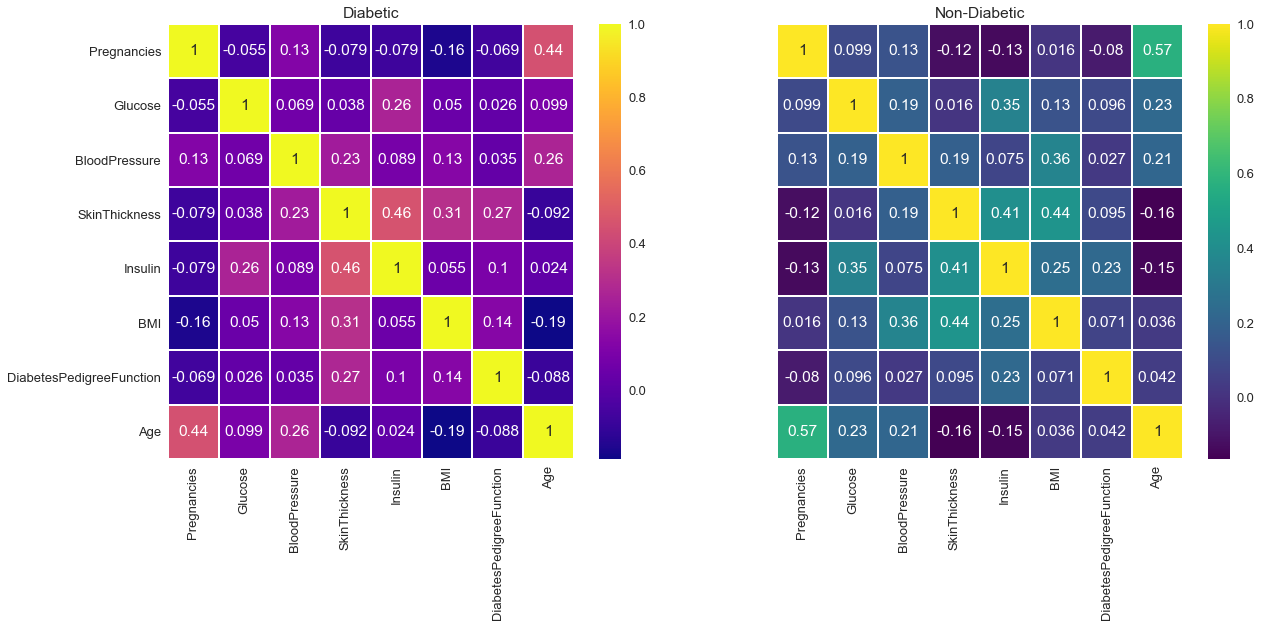

In [19]:
# Visualize the correlation matrix in each Outcomes category
f, axes = plt.subplots(ncols=2, sharey=True, figsize=(20,8))
axes[0].set_title('Diabetic')
sns.heatmap(pima[pima['Outcome'] == 1].iloc[:,:-1].corr(), annot=True, cmap='plasma', linewidths=1, ax=axes[0])
axes[1].set_title('Non-Diabetic')
sns.heatmap(pima[pima['Outcome'] == 0].iloc[:,:-1].corr(), annot=True, cmap='viridis', linewidths=1, ax=axes[1])

**Observation**
- This indicates Glucose and Insulin are positively correlated with Perarson's correlation coefficient of 0.33 which shows that patients with *higher Glucose level tend to have higher Insulin reading*. However, This corelation is more in case of non-diabetic patients.
- SkinThickness has a significant positive relationship with Insulin (0.44) and BMI (0.39) as a whole and also with class wise pairs.
- Age shows a positive correlation with Pregnancies having a Perarson's correlation coefficient of 0.54.
- However, it is evident from the pairplot and the heatmap that _not any of the correlations are so significant_ that we could think of reducing the dimensionality to find out the best model. Hence **we consider all the predictors are independent of each other, which is one of the fundamental assumptions (Independent, Equal) of Naive Bayes**.

With relation to our dataset, this concept can be understood as:
- We assume that **no pair of features are dependent.** For example, the BloodPressure reading has nothing to do with the Insulin level nor with no. of times Pregnancies reported. Hence, the features are assumed to be independent.
- Secondly, **each feature is given the same weight or importance.** For example, knowing only BMI and Glucose level alone can’t help predict the Outcome accuratey. None of the attributes is irrelevant and assumed to be contributing equally to the Outcome class.

**Note**: The assumptions made by Naive Bayes are not generally correct in real-world situations. In-fact, the independence assumption is never correct but often works well in practice.<br/>
Now, before moving on to the implementation of Naive Bayes, let's know about Bayes’ theorem.

---

## Bayes' Theorom
Bayes’ Theorom finds the probability of an event occurring given the probability of another event that has already occurred. it is an extension of conditional probability. Bayes’ theorem is stated mathematically as the following equation: $$P(A|B)=\frac{P(B|A)P(A)}{P(B)}$$
Where, 
- A and B are two events
- $P(A)$: APriori, prior probability
- $P(B)$: Evidence
- $P(B|A)$: Likelihood
- $P(A|B)$: APostiriori, posterior probability

Now, with regards to our dataset, we can apply Bayes’ theorem in following way: $$P(y|X)=\frac{P(X|y)P(y)}{P(X)}$$
Where, y is class variable and X is a dependent feature vector (of size 8) where: $X = (x_{Pregnancies}, x_{Glucose}, x_{BloodPressure}, x_{SkinThickness}, x_{Insulin}, x_{BMI}, x_{DiabetesPedigreeFunction}, x_{Age})$. After applying the naive assumption to Bayes' theorom, the final formula becomes: $$P(y|X) \propto P(y)\prod_iP(x_i|y)$$. Where, $i$ constitues all the 8 feature vectors.<br/>
Now, in order to create a **Na&iuml;ve Bayes classifier** model, we find the probability of given set of inputs for all possible values of the class variable y and pick up the output with maximum probability. This can be expressed mathematically as: $$y={argmax}_yP(y)\prod_iP(x_i|y)$$

## Gaussian Na&iuml;ve Bayes classifier
Gaussian Naive Bayes is useful when working with continuous values whose probabilities can be modeled using a **Gaussian Distribution** whose means and variances are associated with each specific class, can be formulated as: $$P(x_i|y)=\frac{1}{\sqrt{2\pi\sigma_y^2}}e^-\frac{(x_i-\mu_y)^2}{2\sigma_y^2}$$
Where, 
* $e$: Euler constant (2.71828)
* $\mu$: Mean
* $\sigma$: Standard Deviation

**Assumption of Naive Bayes**:
1. Multicollinearity should not exist.
<br/>***Variance Inflation Fctor***: It helps detecting multicollinearity. As the name suggests, a variance inflation factor (VIF) quantifies how much the variance is inflated due to linear relationship between one or more independent attributes. **5.0** is considered as a standard threshold value for VIF. Anything greater than this threshold needs further analysis to determine/drop any of the related attributes. And for any value less than 5.0 we can safely consider there is not multicollinearity in the data. It can be expressed mathematically as: $$VIF_k=\frac{1}{1-R_k^2}$$Where,
  * $R_k^2$: $R^2$-value obtained by regressing the $k^{th}$ predictor on the remaining predictors<br/>
2. Multivariate gaussian distribution of independent attributes.
<br/>***Shapiro-Wilk test***: It evaluates a data sample and quantifies how likely it is to be drawn from a normal/Gaussian distribution. This function returns both the w-statistics calculated by the test and the p-value. Higher the w-stat indicates the sample is drawn from a normal distribution, which is described by the equation $$W=\frac{(\sum a_{i}x_{i})^2}{\sum(x_{i}-\bar{x})^2}$$



### Implementation in scikit-learn
scikit-learn library implements Gaussian Naive Bayes classifier with a class named **GaussianNB**. This model object has a *fit* method to train the model and a *predict* method to predict the output from test/unknown data.
### Model Evaluation
There are many classification metrics used to evaluate the performance of classifier which provide good insight to our classification algorithm. Especially when class distribution is skewed (improper/imbalance ratio of target classes), these metrics helps identify the class level performance. Few important measures are:
* #### Confusion Matrix
This is a square matrix formed by number of different classes available in the target vector. It contains all the correct and misclassifications by the model prediction. Rows represent the actual class where as the columns represent the predicted class values. For a binary classifier like our case study, few definitions are:
    - **True Positive (TP)**: A positive sample correctly classified
    - **False Positive (FP)**: A negative sample misclassified as positive (**Type I** error)
    - **True Negative (TN)**: A negative sample correctly classified
    - **False Negative (FN)**: A positive sample misclassified as negative (**Type II** error)
    
| | |
|:-:|:-:|
|True Negative (**TN**)|False Positive (**FP**)|
|False Negative (**FN**)|True Positive (**TP**)|
* #### Accuracy
The most important metric we rely upon for a classification task is Accuracy, often expressed as follows:
$$Accuracy=1-\frac{Number\;of\;misclassified\;samples}{Total\;number\;of\;samples}=\frac{Number\;of\;correctly\;classified\;samples}{Total\;number\;of\;samples}=\frac{TP+TN}{TP+FP+TN+FN}=\frac{TP+TN}{P+N}$$
* #### Precision
Another useful direct measure is *Precision* (or **Positive Predictive Value**). This is directly connected to the ability to cature features that determine the positiveness of a sample, to avoid misclassification as negative.
$$Precision=\frac{TP}{TP+FP}$$
* #### Recall
The ability to detect true positive samples among all the potential positives. Also known as **Sensitivity**.
$$Recall=\frac{TP}{TP+FN}=\frac{TP}{P}$$
* #### F-Beta
A weighted harmonic mean between *Precision* and *Recall* is provided as: $$F_{beta}=(\beta^2+1)\frac{Precision\:.\:Recall}{\beta^2Precision+Recall}=(\beta^2+1)\frac{TP}{\beta^2(FN+FP)+(1-\beta^2)TP}$$
A beta value less than 1 gives more importance to *Precision* and a value greater than 1 gives more importance to *Recall*. A value equal to 1 determines the so-called $F_1$ score, which is a perfect balance between the two measures.
* #### Precision-Recall Curve
Precision-recall curve is useful when there is imbalanced data in the target classes. The precision and recall can be calculated for thresholds using the *precision_recall_curve()* function that takes the true output values and the probabilities for the positive class as output and returns the precision, recall and threshold values.

**Note:** *Precision* is a measure of FP whereas *Recall* is a measure of FN. In a case of medical diagnostics, the importance of FN is extremly higher. It's acceptable to have a false alarm by FP rather than a miss by FN. FN can cause the death of a patient, whereas FP can be detected in further checks without much consequences. Clearly, in this case study, **having a high Recall is a higher priority than having a system with a high Precision**.

### Generic methods
Let's create a method to calculate VIF for each independent attribute in each iteration.

In [20]:
def calculate_vif(X):
    vif = pd.DataFrame(columns=['Feature', 'VIF'])
    for ix, col in enumerate(X.columns):
        one, other = X[col], X[[i for i in list(X.columns) if i != col]]
        r_square = ols(formula='one~other', data=X).fit().rsquared
        vif.loc[ix] = [col, 1/(1-r_square)]
    return vif.round(1)

Let's create another method to test whether the independent attributes follow normal distribution

In [21]:
def check_normality(X):
    shapiro_df = pd.DataFrame(columns=['Feature', 'w-stat', 'p-value'])
    for ix, col in enumerate(X.columns):
        w_stat, p_value = shapiro(X[col])
        shapiro_df.loc[ix] = [col, w_stat, p_value]
    return shapiro_df

Let's create a method to evaluate our model in various iterations.

In [22]:
def evaluate_model(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    print('*'*40)
    print('The Confusion matrix:\n', cm)
    print('True Positive (TP)\t:', cm[1,1])
    print('True Negative (TN)\t:', cm[0,0])
    print('False Positive (FP)\t:', cm[0,1])
    print('False Negative (FN)\t:', cm[1,0])
    print('*'*40, '\nwith respect to Diabetic class:')
    print('Accuracy Score\t:', np.round(accuracy_score(actual, predicted)*100), '%')
    print('Precision\t:', np.round(precision_score(actual, predicted)*100), '%')
    print('Recall\t\t:', np.round(recall_score(actual, predicted)*100), '%')
    print('F1 Score\t:', np.round(f1_score(actual, predicted)*100), '%')
    print('*'*40)
    print('Overall classification report:\n', classification_report(actual, predicted))
    print('*'*40)

Let's create a method to plot precision-recall curve in various iterations.

In [23]:
def plot_prec_recall_vs_thresh(precisions, recalls, thresholds):
    plt.figure(figsize=(10,5))
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend()

---
## Predictive Modeling
* ### Iteration - 1 (Initial Model)
For the time being in iteration - 1, I am creating the initial model without any data imputation, regularization and living with whatsoever the distribution each independent attribute follow.

In [24]:
# Divide the dataset into feature matrix (X) and target vector (y)
X = pima.iloc[:,:-1]
y = pima.iloc[:,-1]

# Calculate VIF to see if this iteration satisfies assumption #1
calculate_vif(X)

,Feature,VIF
0,Pregnancies,1.4
1,Glucose,1.3
2,BloodPressure,1.2
3,SkinThickness,1.5
4,Insulin,1.4
5,BMI,1.3
6,DiabetesPedigreeFunction,1.1
7,Age,1.6


In [25]:
# Check distribution normality to see if this iteration satisfies assumption #1
check_normality(X)

,Feature,w-stat,p-value
0,Pregnancies,0.904278,1.608089e-21
1,Glucose,0.970104,1.986761e-11
2,BloodPressure,0.818921,1.584007e-28
3,SkinThickness,0.904627,1.751576e-21
4,Insulin,0.722021,7.915248e-34
5,BMI,0.949989,1.840562e-15
6,DiabetesPedigreeFunction,0.836519,2.477697e-27
7,Age,0.874766,2.401947e-24


In [26]:
# Split the data into training and testing set with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [27]:
# Implement the classifier
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None)

In [28]:
# Check for overfitting of the model
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.757328990228013
0.7922077922077922


In [29]:
# Predict the test result
y_pred = model.predict(X_test)

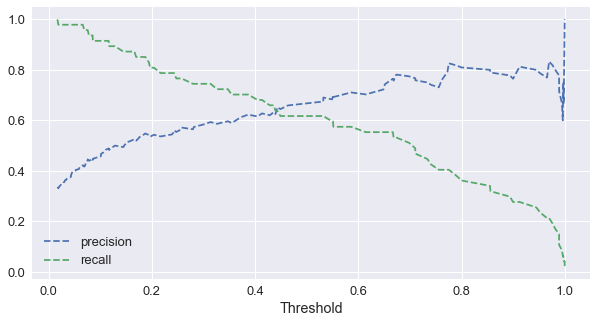

In [30]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only  probs[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test,  probs[:, 1])

plot_prec_recall_vs_thresh(precision, recall, thresholds)

In [31]:
# Evaluate the model
evaluate_model(y_test, y_pred)

****************************************
The Confusion matrix:
 [[93 14]
 [18 29]]
True Positive (TP)	: 29
True Negative (TN)	: 93
False Positive (FP)	: 14
False Negative (FN)	: 18
**************************************** 
with respect to Diabetic class:
Accuracy Score	: 79.0 %
Precision	: 67.0 %
Recall		: 62.0 %
F1 Score	: 64.0 %
****************************************
Overall classification report:
              precision    recall  f1-score   support

          0       0.84      0.87      0.85       107
          1       0.67      0.62      0.64        47

avg / total       0.79      0.79      0.79       154

****************************************


**Observations**
* Accuracy of this model is 79 %. (29 + 93) = 122 labels are correctly predicted out of 154.
* Recall score is less than Precision for Diabetic class.
* F-beta score with beta equals to 1 i.e. $F_1$ score is 64 %

---

* ### Iteration - 2 (Model with Imputed data)
It is impossible to have zero values for 5 attributes such as *Glucose, BloodPressure, SkinThickness, Insulin* and *BMI* from biological standpoint. Hence assuming these constitues *encoded missing data*, Iteration - 2 to check for the performance of the model by imputing these missing values.
#### Data Cleaning
We can't draw proper conclusion and derive a better model when the data is missing/encoded. So it is necessary to clean it up before taking it into consideration.

  The easiest option could be to eliminate all those patients' record with zero values present in any of the attributes where it is biologically impossible, but in this way we would end up eliminating a lot of other important data.

  Hence we use a technique called **Mean Imputation** in which the missing value(s) on a certain attribute is replaced by the mean of the available cases in each *Outcome* category.

In [32]:
# Impute 0's with Mean Imputation technique
print('Imputed values for each attributes are:')
pima_imputed = pd.DataFrame.copy(pima)
for col in pima_imputed.columns[1:-3]:
#   val_to_replace = int(pima_imputed[pima_imputed[col]!=0][col].mean())             # Method 1
    val_to_replace = int(pima_imputed[col].iloc[pima_imputed[col].nonzero()].mean()) # Method 2 (.nonzero() returns the indexes of non-zero ele)
    pima_imputed[col] = pima_imputed[col].replace(0, val_to_replace)
    print('{}: {}'.format(col, val_to_replace))

# Head of the dataset
pima_imputed.head()

Imputed values for each attributes are:
Glucose: 121
BloodPressure: 72
SkinThickness: 29
Insulin: 155
BMI: 32


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,155,33.6,0.627,50,1
1,1,85,66,29,155,26.6,0.351,31,0
2,8,183,64,29,155,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002574A563320>,
      dtype=object)

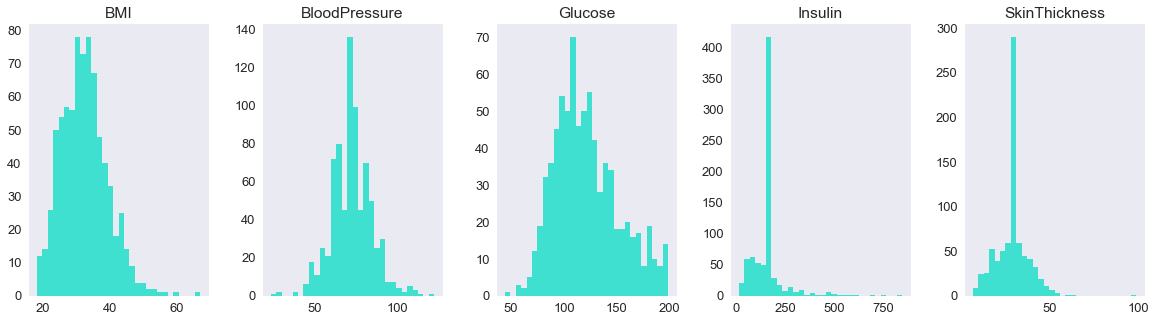

In [33]:
# Let's visualize the imputed data
pima_imputed.iloc[:,1:-3].hist(bins=30, layout=(1,5), figsize=(20,5), grid=False, color='turquoise')

In [34]:
# Divide the dataset into feature matrix (X) and target vector (y)
X = pima_imputed.iloc[:,:-1]
y = pima_imputed.iloc[:,-1]

# Calculate VIF to see if this iteration satisfies assumption #2
calculate_vif(X)

,Feature,VIF
0,Pregnancies,1.4
1,Glucose,1.4
2,BloodPressure,1.2
3,SkinThickness,1.5
4,Insulin,1.2
5,BMI,1.6
6,DiabetesPedigreeFunction,1.0
7,Age,1.6


In [35]:
# Check distribution normality to see if this iteration satisfies assumption #2
check_normality(X)

,Feature,w-stat,p-value
0,Pregnancies,0.904278,1.608089e-21
1,Glucose,0.969861,1.737301e-11
2,BloodPressure,0.987815,5.249668e-06
3,SkinThickness,0.927841,9.477604e-19
4,Insulin,0.689619,2.870286e-35
5,BMI,0.979402,6.255588e-09
6,DiabetesPedigreeFunction,0.836519,2.477697e-27
7,Age,0.874766,2.401947e-24


In [36]:
# Split the data into training and testing set with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [37]:
# Implement the classifier
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None)

In [38]:
# Check for overfitting of the model
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.749185667752443
0.7857142857142857


In [39]:
# Predict the test result
y_pred = model.predict(X_test)

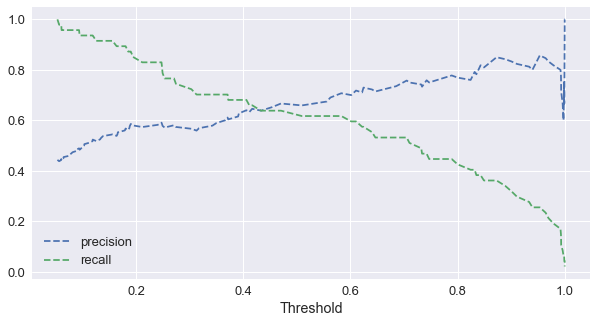

In [40]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only  probs[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test,  probs[:, 1])

plot_prec_recall_vs_thresh(precision, recall, thresholds)

In [41]:
# Evaluate the model
evaluate_model(y_test, y_pred)

****************************************
The Confusion matrix:
 [[92 15]
 [18 29]]
True Positive (TP)	: 29
True Negative (TN)	: 92
False Positive (FP)	: 15
False Negative (FN)	: 18
**************************************** 
with respect to Diabetic class:
Accuracy Score	: 79.0 %
Precision	: 66.0 %
Recall		: 62.0 %
F1 Score	: 64.0 %
****************************************
Overall classification report:
              precision    recall  f1-score   support

          0       0.84      0.86      0.85       107
          1       0.66      0.62      0.64        47

avg / total       0.78      0.79      0.78       154

****************************************


**Observations**
* Accuracy of this model is 79 %. (29 + 92) = 121 labels are correctly predicted out of 154.
* Recall score is less than Precision for Diabetic class and $F_1$ score is 64 %
* There is not much of difference in Iteration - 1 and 2

---

* ### Iteration - 3 (Model with Gaussian input distribution)
The basic requirement of Gaussian Naive Bayes is if the input variables are continous, a Gaussian distribution is assumed. The algorithm will perform better if the univariate distributions of your data are Gaussian or near-Gaussian.<br/>
A normal distribution allows the researcher to make more accurate predictions about a population if the underlying distribution is known. Skewness is when a distribution deviates from this, i.e. a deviation could be positively or negatively skewed. Such a distribution possesses a fluctuated variance (σ) while most of the tests require the distribution to be statistically close and have a constant variance. 
#### Log Transformation
We apply various transformation techniques to handle such exponentially skewed data. *``Log Transformation``* is more popular among them. The outcomes of Log transformation are
  1. *Stabilizes the variance*
  2. *Compresses the range of data*
  3. *Makes the data Normally distributed*

  Our dataset contains *SkinThickness, Insulin, DiabetesPedigreeFunction* and *Age* predictors to have exponentially skewed distribution. We apply **Log2 Transformation provided by Numpy** on these predictors.

In [42]:
pima_log2 = pd.DataFrame.copy(pima_imputed)
pima_log2.iloc[:,1:-1] = np.log2(pima_log2.iloc[:,1:-1])

# Head of the dataset
pima_log2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,7.209453,6.169925,5.129283,7.276124,5.070389,-0.673463,5.643856,1
1,1,6.409391,6.044394,4.857981,7.276124,4.733354,-1.510457,4.954196,0
2,8,7.515700,6.000000,4.857981,7.276124,4.542258,-0.573467,5.000000,1
3,1,6.475733,6.044394,4.523562,6.554589,4.812498,-2.582080,4.392317,0
4,0,7.098032,5.321928,5.129283,7.392317,5.429616,1.194087,5.044394,1


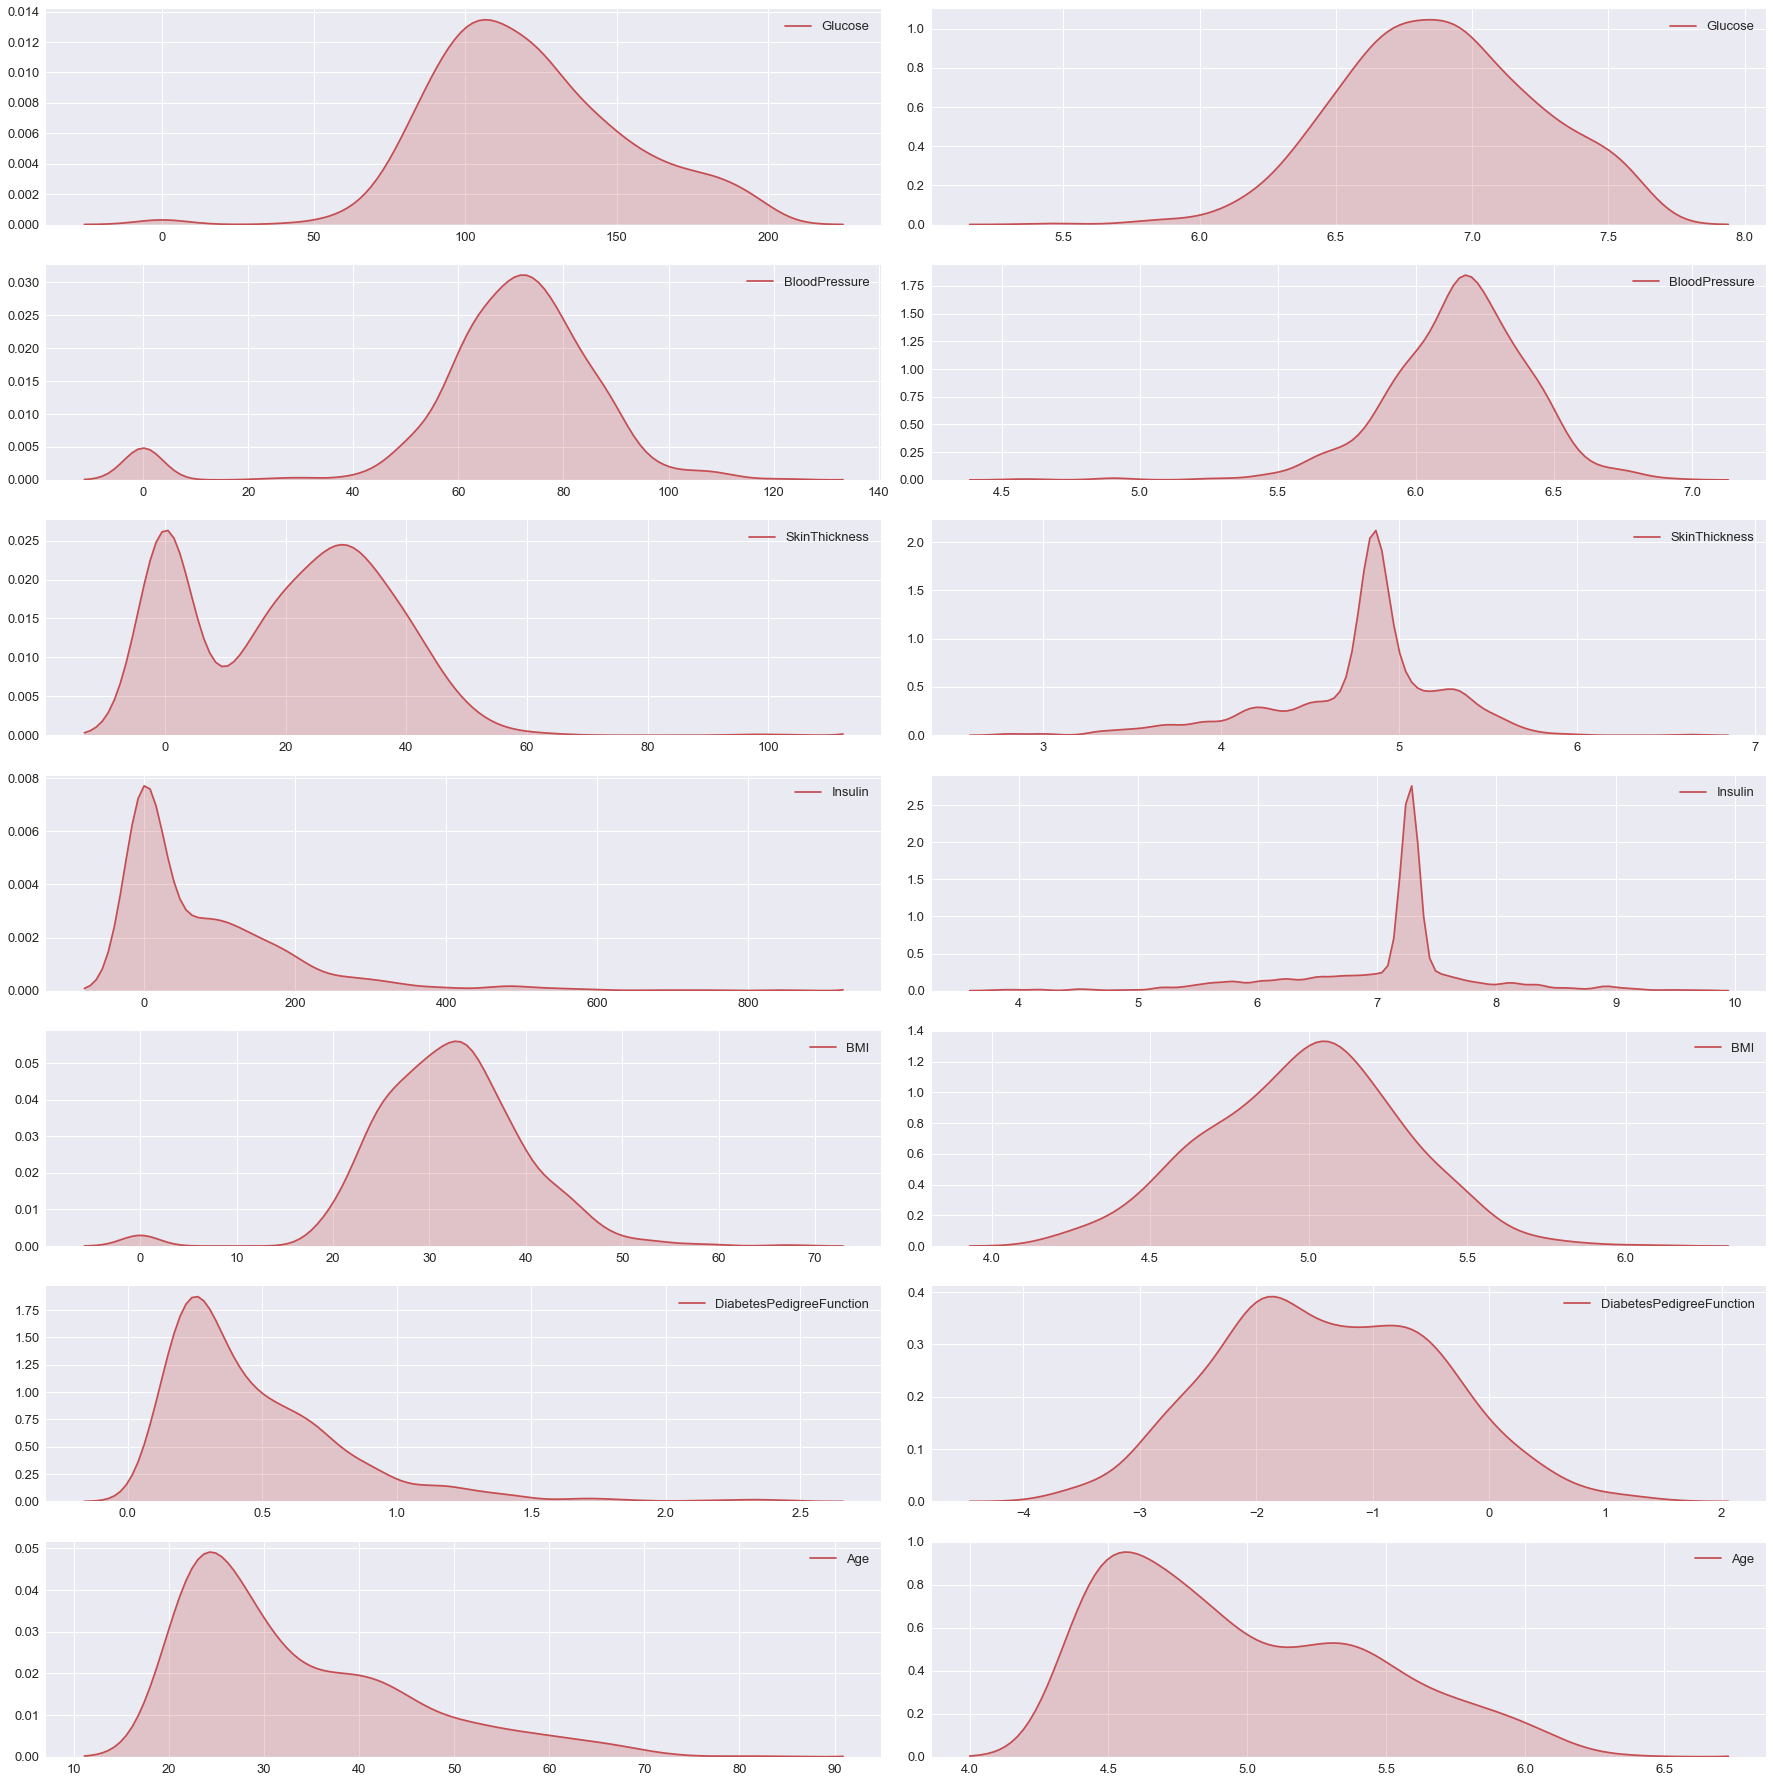

In [43]:
# Plot the distribution for raw vs. transformed data
plt.figure(figsize=(25,25))
index = 0
for col in pima_log2.columns[1:-1]:
    for s in [1,2]:
        plt.subplot(7,2,s+index)
        distro = pima[col] if s == 1 else pima_log2[col]
        sns.kdeplot(distro, shade=True, color='r', legend=True)
    index += 2
plt.tight_layout()

In [44]:
# Divide the dataset into feature matrix (X) and target vector (y)
X = pima_log2.iloc[:,:-1]
y = pima_log2.iloc[:,-1]

# Calculate VIF to see if this iteration satisfies assumption #1
calculate_vif(X)

,Feature,VIF
0,Pregnancies,1.5
1,Glucose,1.3
2,BloodPressure,1.2
3,SkinThickness,1.5
4,Insulin,1.3
5,BMI,1.5
6,DiabetesPedigreeFunction,1.0
7,Age,1.8


In [45]:
# Check distribution normality to see if this iteration satisfies assumption #2
check_normality(X)

,Feature,w-stat,p-value
0,Pregnancies,0.904278,1.608089e-21
1,Glucose,0.991598,2.359073e-04
2,BloodPressure,0.961543,2.563947e-13
3,SkinThickness,0.916038,3.288599e-20
4,Insulin,0.844417,9.179690e-27
5,BMI,0.997010,1.671844e-01
6,DiabetesPedigreeFunction,0.993169,1.397857e-03
7,Age,0.928535,1.169131e-18


In [46]:
# Split the data into training and testing set with 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [47]:
# Implement the classifier
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None)

In [48]:
# Check for overfitting of the model
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.749185667752443
0.7922077922077922


In [49]:
# Predict the test result
y_pred = model.predict(X_test)

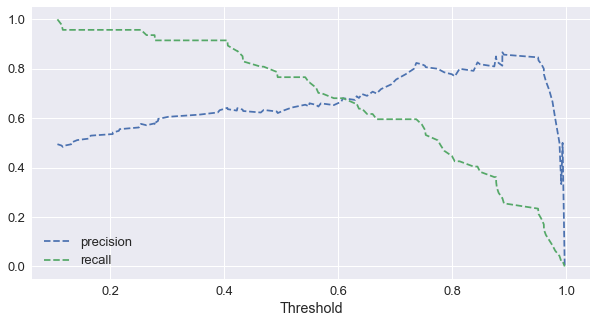

In [50]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only  probs[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test,  probs[:, 1])

plot_prec_recall_vs_thresh(precision, recall, thresholds)

In [51]:
# Evaluate the model
evaluate_model(y_test, y_pred)

****************************************
The Confusion matrix:
 [[86 21]
 [11 36]]
True Positive (TP)	: 36
True Negative (TN)	: 86
False Positive (FP)	: 21
False Negative (FN)	: 11
**************************************** 
with respect to Diabetic class:
Accuracy Score	: 79.0 %
Precision	: 63.0 %
Recall		: 77.0 %
F1 Score	: 69.0 %
****************************************
Overall classification report:
              precision    recall  f1-score   support

          0       0.89      0.80      0.84       107
          1       0.63      0.77      0.69        47

avg / total       0.81      0.79      0.80       154

****************************************


**Observations**
* Accuracy of this model is 79 %. (36 + 86) = 122 labels are correctly predicted out of 154.
* Recall score (77%) is sufficiently larger than Precision (63%) for Diabetic class and $F_1$ score is 69 %
* Model in this iteration seems to be a good model compared to the previous ones.

---

### Conclusion
From the above analysis the model in $3^{rd}$ iteration seems to be a good and acceptable model.